In [22]:
%matplotlib inline
from utils import *
from tqdm import *
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
from multiprocessing import Pool
import numpy as np
import librosa

In [2]:
data_root = 'data/freesound/'
%time samples = np.load(data_root + 'samples.npy')

CPU times: user 915 µs, sys: 7.41 s, total: 7.41 s
Wall time: 9.66 s


In [23]:
sr = 44100
n_fft = 512
hop_length = n_fft / 3
window = np.hanning(n_fft)
def job(y):
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window, center=False)
    amp = librosa.logamplitude(np.abs(S)**2)
    amp = amp[:256,:256] # ignore last time step and highest frequency
    amp = block_reduce(amp, (8,8), func=np.sum)
    amp -= amp.min()
    if amp.max() > 0:
        amp /= amp.max()
    return amp
pool = Pool(8)
%time amps = pool.map(job, samples)

CPU times: user 11.3 ms, sys: 7.89 ms, total: 19.2 ms
Wall time: 76.1 ms


In [4]:
print np.min(amps), np.max(amps)

0.0 1.0


In [12]:
np.save(data_root + 'images.npy', amps)
# amps = np.load(data_root + 'images.npy')

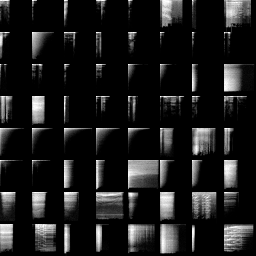

In [24]:
show_array(255 * make_mosaic(amps, n=8))